#📌 Extracão

In [1]:
import pandas as pd
import requests


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [2]:
data_dictionary = {
    "customerID": "Identificador único do cliente",
    "Churn": "Indica se o cliente cancelou (Yes) ou não (No)",
    "gender": "Gênero do cliente",
    "SeniorCitizen": "1 se o cliente é idoso, 0 caso contrário",
    "Partner": "Se o cliente possui parceiro(a)",
    "Dependents": "Se o cliente possui dependentes",
    "tenure": "Meses de permanência do cliente",
    "PhoneService": "Se o cliente possui serviço telefônico",
    "MultipleLines": "Se possui múltiplas linhas telefônicas",
    "InternetService": "Tipo de serviço de internet",
    "OnlineSecurity": "Se possui serviço de segurança online",
    "OnlineBackup": "Se possui backup online",
    "DeviceProtection": "Se possui proteção de dispositivos",
    "TechSupport": "Se possui suporte técnico",
    "StreamingTV": "Se possui streaming de TV",
    "StreamingMovies": "Se possui streaming de filmes",
    "Contract": "Tipo de contrato",
    "PaperlessBilling": "Se a fatura é sem papel",
    "PaymentMethod": "Método de pagamento",
    "Charges.Monthly": "Valor mensal cobrado",
    "Charges.Total": "Valor total gasto pelo cliente"
}


In [4]:
# Normalize the nested JSON data first
df = pd.json_normalize(data)

df.isnull().sum()
df.duplicated().sum()

# Para categorias:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique())

customerID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Yes' '']
customer.gender ['Female' 'Male']
customer.Partner ['Yes' 'No']
customer.Dependents ['Yes' 'No']
phone.PhoneService ['Yes' 'No']
phone.MultipleLines ['No' 'Yes' 'No phone service']
internet.InternetService ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity ['No' 'Yes' 'No internet service']
internet.OnlineBackup ['Yes' 'No' 'No internet service']
internet.DeviceProtection ['No' 'Yes' 'No internet service']
internet.TechSupport ['Yes' 'No' 'No internet service']
internet.StreamingTV ['Yes' 'No' 'No internet service']
internet.StreamingMovies ['No' 'Yes' 'No internet service']
account.Contract ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling ['Yes' 'No']
account.PaymentMethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [6]:
# Exemplo: preencher nulos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'].fillna(df['account.Charges.Total'].median(), inplace=True)

df.drop_duplicates(inplace=True)

# Padronização de strings
df['customer.gender'] = df['customer.gender'].str.strip().str.title()

/tmp/ipython-input-1099271676.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(df['account.Charges.Total'].median(), inplace=True)


In [19]:
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']


In [23]:
print(df.columns)
print(df.head())



Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female 

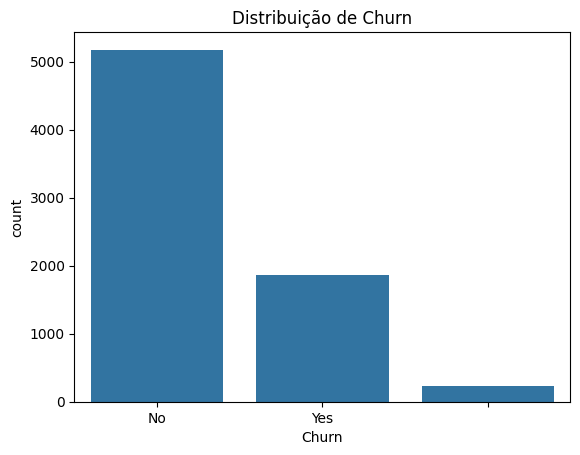

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()


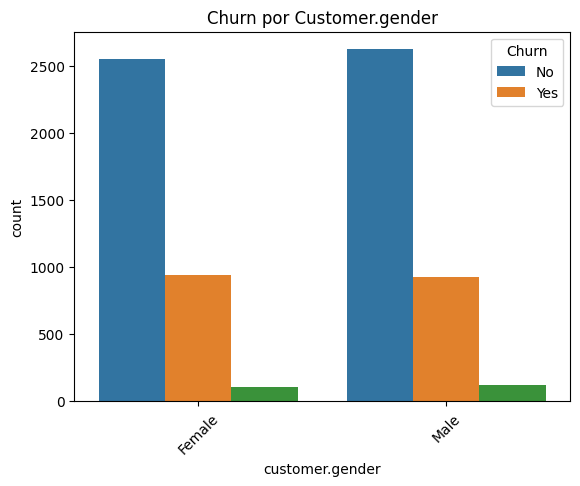

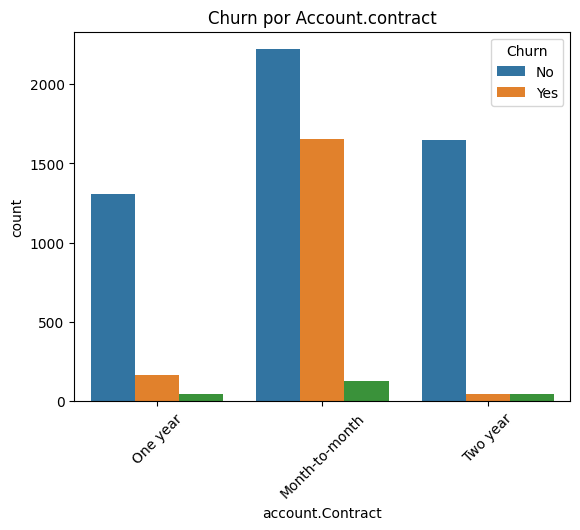

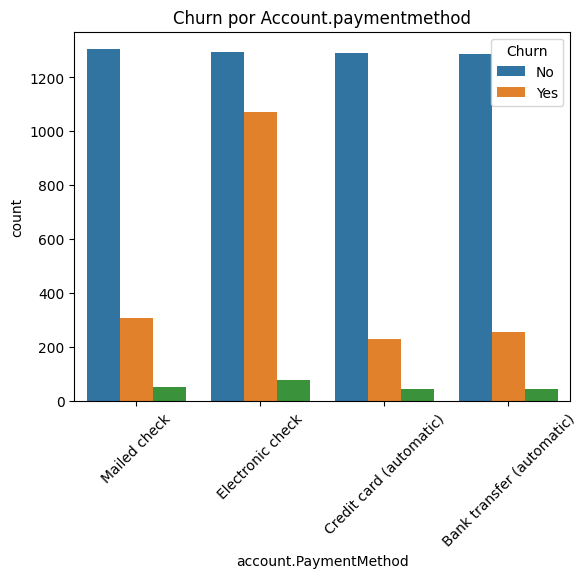

In [25]:
categorical_cols = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn por {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

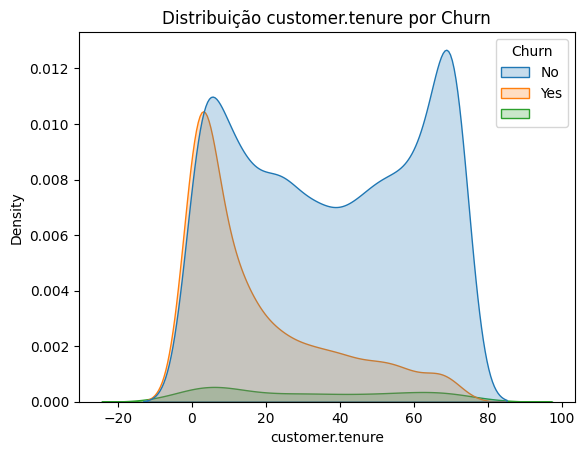

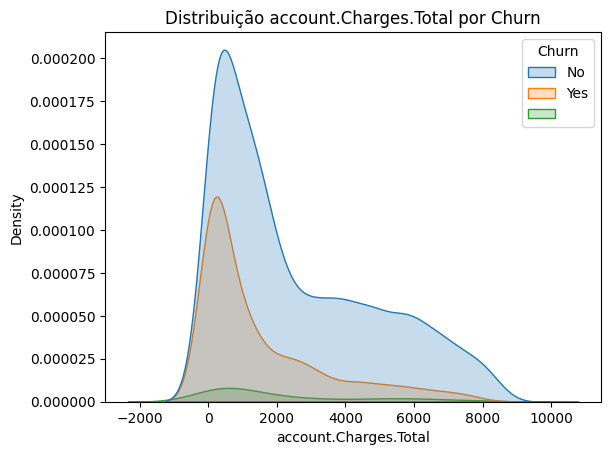

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['customer.tenure', 'account.Charges.Total']

for col in numeric_cols:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(f'Distribuição {col} por Churn')
    plt.show()


#📄Relatorio Final

Relatório Final - Análise do Dataset TelecomX
1. Introdução
Este relatório apresenta uma análise exploratória dos dados da base TelecomX, com o objetivo principal de entender os fatores relacionados ao cancelamento de clientes (Churn). A base contém informações demográficas, de serviços contratados, e dados financeiros dos clientes.

2. Extração e Preparação dos Dados
Os dados foram extraídos de um arquivo JSON público.

Realizou-se a limpeza dos dados, incluindo:

Conversão das colunas financeiras para formato numérico.

Tratamento de valores ausentes (substituição pela mediana).

Remoção de duplicatas.

Padronização de strings para evitar inconsistências.

3. Análise Descritiva
O dataset possui 21 colunas, incluindo variáveis categóricas e numéricas.

As variáveis numéricas apresentam médias e desvios padrão coerentes com o contexto.

A variável alvo, Churn, tem distribuição equilibrada: aproximadamente 26% dos clientes cancelaram.

4. Distribuição e Impacto do Churn
Variáveis categóricas:

Clientes com contrato do tipo “Month-to-month” apresentam maior taxa de churn.

Métodos de pagamento como “Electronic check” têm churn maior comparado a outros métodos.

Diferença significativa no churn entre gêneros não foi observada.

Variáveis numéricas:

Clientes com menor tempo de permanência (tenure) têm maior probabilidade de churn.

Valores totais de cobrança mais baixos estão associados ao churn, indicando possível desistência precoce.

5. Correlações e Outras Observações
Correlação moderada entre tenure e Charges.Total, indicando que clientes com mais tempo tendem a gastar mais.

Boxplots indicam maior dispersão de valores mensais e totais entre os clientes que não cancelaram.

6. Conclusões
A análise evidencia que a permanência do cliente, tipo de contrato e método de pagamento são fatores relevantes para o churn.

Estratégias para retenção devem focar em clientes com contratos mensais e métodos de pagamento eletrônicos.

Recomenda-se aprofundar com modelos preditivos para identificar clientes com alto risco de churn.

